In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from svm_source import *
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings("ignore")


%matplotlib notebook
plt.style.use('ggplot')

# TP n°1 : Support Vector Machine (SVM)

## Linear SVM

**3)** Draw a i.i.d. sample from a mixture of two Gaussian distrtibutions : each class is a Gaussian with specific parameters. One could use the function make_blobs available in sklearn.datasets library. Reserve 75% of the data for training and 25% for the test data.

Text(0.5,1,'Two blobs')

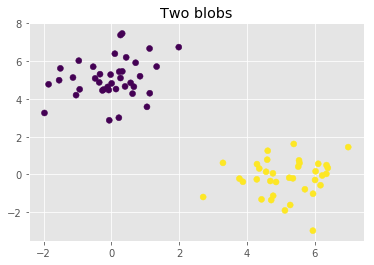

In [2]:
X, y = make_blobs(n_samples=100, centers=[[0,5],[5,0]], n_features=2, random_state=10)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.title("Two blobs")



**4)** Since the probability distributions are known, numerically estimate the Bayes risk.

In [3]:
from scipy.stats import multivariate_normal

# Monte-Carlo estimation of the Bayes Risk (given this distribution)
n_mc = 10000

def classification(x,centers):
    n=len(centers)
    res=centers[0]
    for center in centers: 
        if 

SyntaxError: invalid syntax (<ipython-input-3-7ab65a674c86>, line 10)

**5)** Draw the decision boundary H induced by SVM as well as the hyperplanes H1 and H−1. Vary the parameter C to see its impact on the number of support vectors. We can use the example https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html.

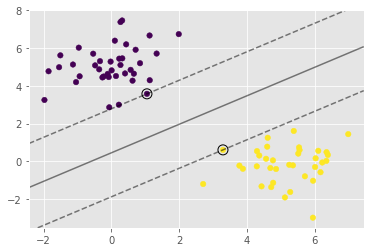

In [4]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**6)** Define the Gaussian classes such that the two distributions overlap. Draw an i.i.d. sample from the joint probability distribution. Apply a 5-fold Cross-Validation to find the optimal parameter C∗ to classify this new dataset using a linear kernel.

In [5]:
center = np.array([[0,0], [4,4]])
 
X, y = make_blobs(n_samples=1000, centers=center, n_features=2,
                  random_state=0, cluster_std =2)

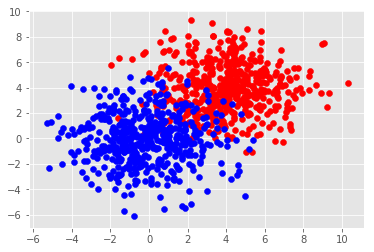

In [6]:
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]
plt.scatter(X[pos,0], X[pos,1], c='r')
plt.scatter(X[neg,0], X[neg,1], c='b')
plt.show()

In [7]:
C_grid_lsvm = {'C': np.arange(1,1000,10)/1000000.0}
Lsvm = svm.SVC(kernel='linear', C=C_grid_lsvm)
grid = GridSearchCV(Lsvm, C_grid_lsvm, cv=5)
grid.fit(X, y)

print('The best C is', grid.best_params_.get('C'), ' with a score equal to ', grid.best_score_)

bestLvsm = svm.SVC(kernel='linear', C=grid.best_params_.get('C'))
bestLvsm.fit(X, y)
y_pred = bestLvsm.predict(X_test)

('The best C is', 0.000531, ' with a score equal to ', 0.933)


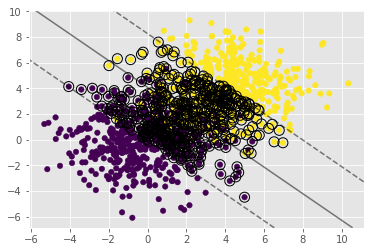

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = bestLvsm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(bestLvsm.support_vectors_[:, 0], bestLvsm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**7)** Show how tuning SVM hyperparameters on training data, for example by taking a Gaussian kernel (the parameters are therefore gamma and C), can lead to overfitting.

In [9]:
center = np.array([[0,0], [4,4]])
 
X, y = make_blobs(n_samples=1000, centers=center, n_features=2,
                  random_state=0, cluster_std =2)

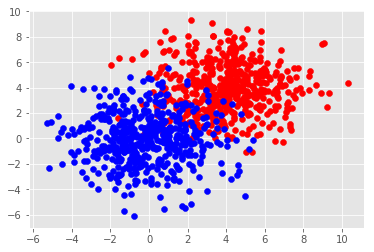

In [10]:
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]
plt.scatter(X[pos,0], X[pos,1], c='r')
plt.scatter(X[neg,0], X[neg,1], c='b')
plt.show()

In [11]:
C_grid_lsvm = {'C': np.arange(1,1000,10)/1000000.0}
Lsvm = svm.SVC(kernel='rbf', C=C_grid_lsvm)
grid = GridSearchCV(Lsvm, C_grid_lsvm, cv=5)
grid.fit(X, y)

print('The best C is', grid.best_params_.get('C'), ' with a score equal to ', grid.best_score_)

bestLvsm = svm.SVC(kernel='rbf', C=grid.best_params_.get('C'))
bestLvsm.fit(X, y)
y_pred = bestLvsm.predict(X_test)

('The best C is', 1e-06, ' with a score equal to ', 0.93)


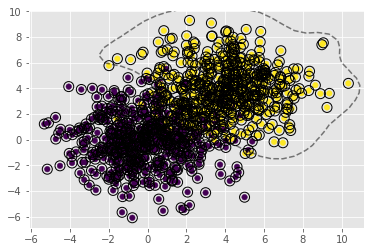

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = bestLvsm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(bestLvsm.support_vectors_[:, 0], bestLvsm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Non linear SVM

**8)** Define a new binary nonlinear classification problem : for instance, define one class as a Gaussian surrounded by the other chosen as a circle class, or choose the second class as a mixture of two Gaussian in such way that the separation problem is nonlinear. Generate a non-linearly separable dataset (we could for example use the function make_blobs available in sklearn.datasetslibrary ).

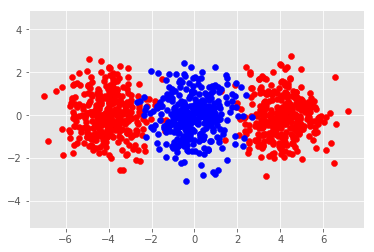

In [13]:
center = np.array([[0,0], [4,0], [-4,0]])

X, y = make_blobs(n_samples=1000, centers=center, cluster_std=1.0, n_features=2, random_state=0)
y[y==2] = 1

pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)




plt.scatter(X[pos,0], X[pos,1], c='r')
plt.scatter(X[neg,0], X[neg,1], c='b')
plt.axis('equal')
plt.show()

**9)** Use an SVM with a Gaussian kernel then a polynomial (with well-adapted parameters) then plot the decision boundaries of these algorithms on separate graphs.

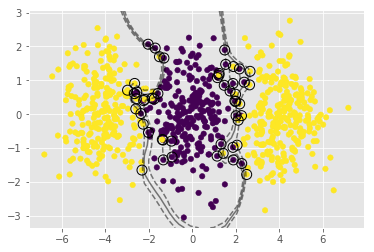

In [14]:
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X_train, y_train)


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


**10)** We wish to compare classification performance between different SVMs based on different kernels (linear, polynomial and Gaussian). Propose a method allowing to compare these three algorithms.

**11)** Draw the learning curve of the algorithm : with fixed hyper-parameters and fixed test set, calculate the training and test errors by using training sub-sets of training data of various sizes (drawn randomly). Plot the train and test error based on the size of the train set subset. Estimate and display the accuracy of the Bayes predictor on the same graph. Comment.

**12)** Add noise to the dataset by randomly modifying the labels of some training data. Then, draw the complexity curves of the algorithm : with set train and test set, draw the train and test error as a function of the complexity (i.e. as a function of the value of the hyper-parameter controlling the complexity, or the number of support vector). Comment.

In [ ]:
n_noise = 50
n_tr = len(y_train)
idx = np.random.choice(range(n_tr), n_noise)
y_train[idx] = 1 - y_train[idx]

pos = np.where(y_train == 1)[0]
neg = np.where(y_train == 0)[0]

plt.scatter(X_train[pos,0], X_train[pos,1], c='r')
plt.scatter(X_train[neg,0], X_train[neg,1], c='b')
plt.axis('equal')
plt.show()

## Pour aller plus loin : application à la classification de visages

In [15]:
###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)


In [17]:
print(X.shape)
print(y.shape)

(380, 10000)
(380,)


In [23]:
### CLASSIFY AND TEST ###

from time import time
import pylab as pl

####################################################################
# Split data into a half training and half test set
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X, y, images, test_size=0.1, random_state=0)

####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
t0 = time()
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

print("Done in %0.3fs" % (time() - t0))

print("Predicting the people names on the testing set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print("Accuracy : %s" % clf.score(X_test, y_test))

Fitting the classifier to the training set
Done in 0.758s
Predicting the people names on the testing set
done in 0.072s
Chance level : 0.6210526315789474
Accuracy : 0.9210526315789473


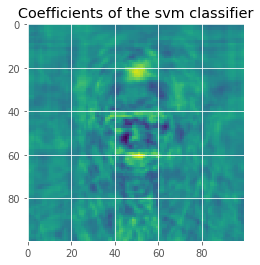

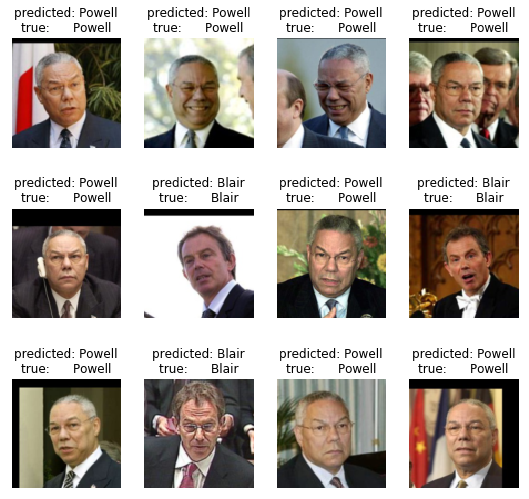

In [24]:
### PLOT SOME VISUAL RESULTS ###

####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))
pl.title("Coefficients of the svm classifier")

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())
        
def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()



**16)** Show the influence of the regularization parameter. For example, the prediction error can be dis-
played as a function of C on a logarithmic scale between 1e5 and 1e-5.

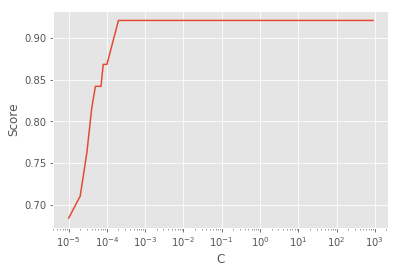

In [28]:
Cs = [i * 10**j for j in range(-5,3) for i in range(1,10)]
scores = []

for c in Cs:
    clf=svm.SVC(kernel='linear', C = c)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(Cs, scores)
plt.xscale("log")
plt.ylabel("Score")
plt.xlabel("C")
plt.show()

**17)** By adding nuisance variables, thus increasing the number of variables to the number of learning
points fixed, show that performance drops.

**&**

**19)** What is the effect of choosing a non-linear RBF kernel on prediction? You will be able to improve the prediction with a reduction of dimension based on the object sklearn.decomposition.RandomizedPCA.